In [1]:
import numpy as np
import matplotlib.pyplot as plt 





A=0.100000 * mean
0.000143690351301
4.30571407044e-05
2.26820439798e-05


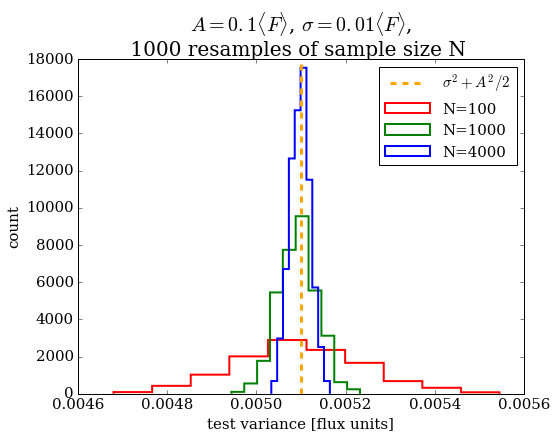

In [215]:

flux_mean = 1

#for factor in np.linspace(0.001, 0.1, 10):
factor = 0.1
A = factor* flux_mean
sigma =  0.1*A # constant sigma for all points 
print('A=%f * mean'%factor)
theory_variance = sigma**2.0 + A**2.0 / 2
fig,ax = plt.subplots(figsize=(8,6))

colors = ['r','g','b']
j=0
for N in [100,1000,4000]:
    
    test_variance = np.zeros(1000)
    for i in range(1000):
        time_array = np.arange(N)
        err = np.random.normal(scale=sigma, size=N) # draw randomly 100 samples of errors 
        y = A * np.sin(time_array) + err

        test_variance[i] = np.var(y)
       
    print np.std(test_variance)   

    ax.hist(test_variance, histtype='step', linestyle='-',
            color=colors[j], normed=True, label='N='+str(N), lw=2)
    
    j+=1
ax.axvline(theory_variance, lw=3, color='orange', ls='--', label=r'$\sigma^{2} + A^{2} / 2$')
ax.set_xlabel('test variance [flux units]')
ax.set_ylabel('count')
ax.set_title(r'$A=0.1 \langle F \rangle$, $\sigma=0.01 \langle F \rangle$,'+'\n 1000 resamples of sample size N  ', fontsize=20)
plt.legend()
plt.savefig('../data_products/AstroML_10.1.1_variance.png')    #print('V_sample=%.2e, V_theory=%.2e'%(sample_variance, theory_variance))

In [67]:
N_arr = np.arange(6,101)  * 10
N_arr

array([  60,   70,   80,   90,  100,  110,  120,  130,  140,  150,  160,
        170,  180,  190,  200,  210,  220,  230,  240,  250,  260,  270,
        280,  290,  300,  310,  320,  330,  340,  350,  360,  370,  380,
        390,  400,  410,  420,  430,  440,  450,  460,  470,  480,  490,
        500,  510,  520,  530,  540,  550,  560,  570,  580,  590,  600,
        610,  620,  630,  640,  650,  660,  670,  680,  690,  700,  710,
        720,  730,  740,  750,  760,  770,  780,  790,  800,  810,  820,
        830,  840,  850,  860,  870,  880,  890,  900,  910,  920,  930,
        940,  950,  960,  970,  980,  990, 1000])

In [211]:
# test chi-squared

flux_mean = 1

#for factor in np.linspace(0.001, 0.1, 10):
factor = 0
A = factor* flux_mean
sigma =  0.1 # constant sigma for all points 
#print('A=%f * mean'%factor)
#theory_variance = sigma**2.0 + A**2.0 / 2
#theory_chi2 = 

N_arr = np.arange(1,100)  * 100

stdev_chi2 = np.zeros(len(N_arr))

j=0
for N in N_arr:
    
    # draw M samples of size N 
    M = 100 
    test_variance = np.zeros(M)
    test_chi2 = np.zeros(M)
    
    for i in range(100):
        time_array = np.arange(N)
        err = np.random.normal(scale=sigma, size=N) # draw randomly 100 samples of errors 
        y = A * np.sin(time_array) + err

        test_variance[i] = np.var(y)
        test_chi2[i]  = np.sum((y / sigma)**2.0) / N
    theory_chi2 = test_variance / (sigma**2.0)



    #print np.std(test_variance)    
    #plt.hist(test_chi2)
    #plt.hist(theory_chi2)

    #print('N=%d, sqrt(2/N)=%f, stdev(chi2)=%f'%(N, np.sqrt(2.0/N),np.std(test_chi2)))
    stdev_chi2[j] = np.std(test_chi2)
    j += 1 
    #print('V_sample=%.2e, V_theory=%.2e'%(sample_variance, theory_variance))


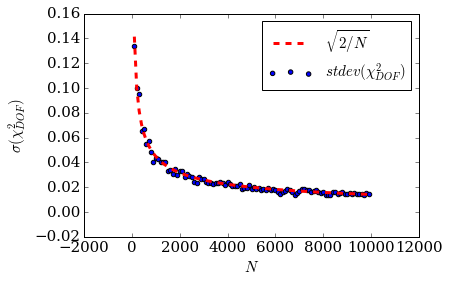

In [212]:
plt.scatter(N_arr, stdev_chi2, label=r'$stdev(\chi^{2}_{DOF})$')
plt.plot(N_arr,np.sqrt(2.0/N_arr) , label=r'$\sqrt{2/N}$', color='red', ls='--', lw=3)
plt.xlabel(r'$N$', fontsize=15)
plt.ylabel('$\sigma(\chi^{2}_{DOF})$', fontsize=15)
plt.legend()
plt.savefig('../data_products/AstroML_10.1.1_chi2DOF.png')
#plt.plot(stdev_chi2,stdev_chi2)
#plt.plot(np.sqrt(2.0/N_arr),np.sqrt(2.0/N_arr))

In [2]:
# test detectability of Amplitude...
import matplotlib.pyplot as plt 
import sys
sys.path.insert(0, '/astro/users/suberlak/S13Agg_analysis/packages/')
import variabilityFunctions as varF
reload(varF)

<module 'variabilityFunctions' from '/astro/users/suberlak/S13Agg_analysis/packages/variabilityFunctions.pyc'>

In [3]:
from astroML.plotting import setup_text_plots

def plot_astroml_five_eight(plot_data,amp_factor,err_factor): 
    # Setup plots specifics
    setup_text_plots(fontsize=15, usetex=False)
    # Analog of Fig. 5.8
    #--------------------------------------------------
    # Plot data
    fig, ax = plt.subplots(1,3,figsize=(16, 4))
    fig.subplots_adjust(left=0.1, right=0.95, wspace=0.24,
                        bottom=0.15, top=0.9)

    # first plot the histograms for mu
    #ax = fig.add_subplot(121)
    mu, sigma = plot_data['mu'], plot_data['sigma']
    p_mu, p_sigma = plot_data['p_mu'], plot_data['p_sigma']

    # plot the marginalized distribution
    ax[0].plot(mu,p_mu, '-k', label='marginalized')

    # plot the bootstrap distribution
    #bins = np.linspace(-3, 5, 14)
    ax[0].hist(plot_data['mu_boot'], histtype='step', linestyle='dashed',
            color='b', normed=True, label='approximate')

    # plot vertical line: newer matplotlib versions can use ax.vlines(x)
    #ax.plot([mu_true, mu_true], [0, 1.0], ':k', lw=1)

    ax[0].set_xlabel(r'$\mu$')
    ax[0].set_ylabel(r'$p(\mu)$')
    ticks = ax[0].get_xticks()
    ax[0].set_xticks(ticks[1::2])
    muWmean  = calcWeightedMean(plot_data['mu'],plot_data['p_mu'])
    muWstd = calcWeightedStDev(plot_data['mu'],plot_data['p_mu'], muWmean)
    ax[0].axvline(muWmean, ls = '-', lw=2, color='black')
    ax[0].axvline(np.mean(plot_data['mu_boot']), ls = '-.', lw=2, color='blue')
    #ax[0].set_xticks(ax.get_xticklabels()[::2], visible=False)
    #ax.set_ylim(0, 1.0)


    # first plot the histograms for sigma
    #ax = fig.add_subplot(122)

    # plot the marginalized distribution
    ax[1].plot(sigma, p_sigma, '-k', label='full')

    # plot the bootstrap distribution
    #bins = np.linspace(0, 5, 31)
    ax[1].hist(plot_data['sigma_boot'], histtype='step', linestyle='dashed',
            color='b', normed=True, label='approx')

    # plot vertical line: newer matplotlib versions can use ax.vlines(x)
    #ax.plot([sigma_true, sigma_true], [0, 1.0], ':k', lw=1)

    ax[1].set_xlabel(r'$\sigma$')
    ax[1].set_ylabel(r'$p(\sigma)$')
    #ax[1].legend(loc=1, prop=dict(size=15))
    ticks = ax[1].get_xticks()
    ax[1].set_xticks(ticks[::2])
    sigWmean  = calcWeightedMean(plot_data['sigma'],plot_data['p_sigma'])
    sigWstd = calcWeightedStDev(plot_data['sigma'],plot_data['p_sigma'], sigWmean)
    ax[1].axvline(sigWmean, ls = '-', lw=2, color='black')
    ax[1].axvline(np.mean(plot_data['sigma_boot']), ls = '-.', lw=2, color='blue') 
    #ax[1].set_xlim(0, 0.4)
    #ax[1].set_ylim(0, 1.0)
    # Analog of Fig. 5.7 
    # Print the Gaussian Distribution with Gaussian Errors  logarithm of the posterior probability density function 
    #------------------------------------------------------------
    # plot the results
    from astroML.plotting.mcmc import convert_to_stdev

    im = ax[2].imshow(plot_data['logL'], origin='lower',
               extent=(mu[0], mu[-1], sigma[0], sigma[-1]),
               cmap=plt.cm.binary,
               aspect='auto',vmin=-5, vmax=0)
    #cbar = plt.colorbar(im , ax=ax[2])
    #

    import matplotlib as mpl
    cax,kw = mpl.colorbar.make_axes([axis for axis in ax.flat])
    cbar = plt.colorbar(im, cax=cax, **kw)
    cbar.set_label(r'$\log(L)$')

    #cbar.set_clim(-5, 0)

    #plt.text(0.5, 0.93,
    #         (r'$L(\mu,\sigma)\ \mathrm{for}\ \bar{x}=1,\ '
    #          r'\sigma_{\rm true}=1,\ n=10$'),
    #         bbox=dict(ec='k', fc='w', alpha=0.9),
    #         ha='center', va='center', transform=plt.gca().transAxes)

    ax[2].contour(mu, sigma, convert_to_stdev(plot_data['logL']),
                levels=(0.683, 0.955, 0.997),
                colors='k')
    ax[2].scatter(plot_data['mu_max'], plot_data['sigma_max'],marker='*', color='orange', lw=1, s=50)
    ax[2].set_xlabel(r'$\mu$')
    ax[2].set_ylabel(r'$\sigma$')
    #ax[2].set_xlim(23.84, 23.96)
    #ax[2].set_ylim(0,0.1 * max(plot_data['p_sigma']))
    ticks = ax[2].get_xticks()
    ax[2].set_xticks(ticks[::2])

    ticks = ax[2].get_yticks()
    ax[2].set_yticks(ticks[::2])
    
    fig.suptitle('%d%% Error, %.2f %% Amplitude '%(100*err_factor,100*amp_factor))
    #plt.tight_layout()
    name = '../data_products/Fig_5-8_AstroML_e_'+str(err_factor)+'_A_'+str(amp_factor)+'.png'
    #plt.tight_layout()
    plt.savefig(name)
    plt.show()

In [4]:
def calcWeightedMean(y,weights):
    ''' Calculate the weighted mean '''
    N = len(y)
    if N == 1 : 
        return float(y)    
    elif N == 0 : 
        return np.nan
    else: 
        # weights = 1 / (yerr ** 2.0)  
        wMean = np.sum(weights * y) / np.sum(weights)
        return wMean

    
def calcWeightedStDev(y, weights, yWmean):
    ''' Calculate the  weighted standard deviation
    '''
    N = len(y)
    if N == 1:
        return float(yerr)
    elif N == 0:
        return np.nan 
    else :     
        return np.sqrt((1 / (N-1.0) ) * (np.sum(weights * ((y - yWmean) ** 2.0)) / np.sum(weights)))  

def update_progress(progress):
    ''' A simple function updating the time progress. 
    
    progress : a value (float or int) between 0 and 100 indicating 
               percentage progress 
    '''
    print '\r[%-10s] %0.2f%%' % ('#' * int(progress/10), progress),

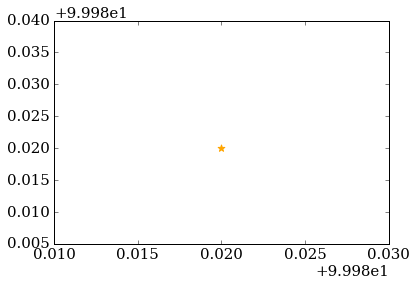

In [322]:
%matplotlib inline
fig,ax = plt.subplots()
ax.scatter(N,N, marker='*', color='orange', lw=1, s=50)

In [54]:

%matplotlib inline
sig_factors = [0.01, 0.1]
amp_factors = np.linspace(0.001, 0.3, 100)


#res = {}
#res['amp_mean_ratio'] = np.zeros(0)
#res['amp_mag']    = np.zeros(0)
#res['amp_flux']   = np.zeros(0)
#res['amp_factor']   = np.zeros(0)
#res['sigma_mag']  = np.zeros(0)
#res['sigma_flux'] = np.zeros(0)
#res['mu_mag'] = np.zeros(0)
#res['mu_flux']= np.zeros(0)



N_arr = np.arange(6,101)  * 10 # 60-1000 

sig_factor = sig_factors[0]  # 10% error 
flux_mean = 1
sigma = sig_factor * flux_mean

#amp_min_factor = np.zeros(len(N_arr))

i = 0
#for N in N_arr :  
N = 100
time_array = np.arange(N)
flux_err = np.random.normal(scale=sigma, size=N)

amp_factor = 0.1 # amplitude 10% of the mean flux 

record = {}
record['sig_factor'] = sig_factor
record['amp_factor']=np.zeros(0)
record['exp_mu_full'] = np.zeros(0)
record['exp_mu_approx'] = np.zeros(0)
record['exp_sig_full'] = np.zeros(0)
record['exp_sig_approx'] = np.zeros(0)
record['std_mu_full'] = np.zeros(0)
record['std_mu_approx'] = np.zeros(0)
record['std_sig_full'] = np.zeros(0)
record['std_sig_approx'] = np.zeros(0)
record['2D_max_mu_full'] = np.zeros(0)
record['2D_max_sig_full'] = np.zeros(0)


sigma_max = 1 # start with some number bigger than zero ...

#while sigma_max > 0 : #for amp_factor in amp_factors : 
# in the loop decrease the amplitude until it is undetectable... 
A = amp_factor  * flux_mean
flux = A * np.sin(time_array) + flux_err #+ flux_mean
#plt.figure()
#plt.errorbar(time_array, flux, flux_err)
#mag = flux2ab(flux)
#mag_err = flux2absigma(flux,flux_err)
np.random.seed(5)
mu_true = 1.
sigma_true = 1.
N = 100
ei = 3 * np.random.random(N)
xi = np.random.normal(mu_true, np.sqrt(sigma_true ** 2 + ei ** 2))
#A_mag = np.mean(amp_factor * np.mean(mag))

# do it in magnitude space... 
#plot_data, mu_mag, sigma_mag =  varF.get_mu_sigma(mag,mag_err, return_plot_data=True)
#plot_astroml_five_eight(plot_data,amp_factor,factor)

# do it in flux space ...
m = 1000
for i in range(m):
    #if i % 10 == 0 : 
    #progress = (i / m)*100
    #update_progress(progress)

    #plot_data, mu_max, sigma_max = varF.get_mu_sigma(flux, flux_err,N_boot=1000, return_plot_data=True)
    plot_data, mu_max, sigma_max = varF.get_mu_sigma(xi, ei ,N_boot=1000, return_plot_data=True)
    #record['amp_factor'] = np.append(record['amp_factor'], amp_factor)


    # calculate mean and standard deviation,
    # weighted by the probability 
    # mean =  np.sum(p_mu * mu) / np.sum(p_mu)
    # std = sqrt((1 / (N-1.0) ) * (np.sum(p_mu * ((y - mean) ** 2.0)) / np.sum(p_mu)))  
    muWmean  = calcWeightedMean(plot_data['mu'],plot_data['p_mu'])
    muWstd = calcWeightedStDev(plot_data['mu'],plot_data['p_mu'], muWmean)
    record['exp_mu_full'] = np.append(record['exp_mu_full'],muWmean)
    record['std_mu_full'] = np.append(record['std_mu_full'] ,muWstd)

    sigWmean  = calcWeightedMean(plot_data['sigma'],plot_data['p_sigma'])
    sigWstd = calcWeightedStDev(plot_data['sigma'],plot_data['p_sigma'], sigWmean)
    record['exp_sig_full'] = np.append(record['exp_sig_full'], sigWmean)
    record['std_sig_full'] = np.append(record['std_sig_full'], sigWstd)

    # calculate mean and standard deviation
    # from bootstrapped resamples 
    # in this case it is simply a measure of 
    # unweighted mean and std of the mu_boot or sigma_boot

    record['exp_mu_approx'] = np.append(record['exp_mu_approx'], np.mean(plot_data['mu_boot']))
    record['exp_sig_approx'] = np.append(record['exp_sig_approx'], np.mean(plot_data['sigma_boot']))


    record['std_mu_approx'] = np.append(record['std_mu_approx'], np.std(plot_data['mu_boot']))
    record['std_sig_approx'] = np.append(record['std_sig_approx'], np.std(plot_data['sigma_boot']))

    # calculate the maximum of the 2D posterior log-likelihood 

    record['2D_max_mu_full'] = np.append(record['2D_max_mu_full'] , mu_max)
    record['2D_max_sig_full'] = np.append(record['2D_max_sig_full'] , sigma_max)


print('All done')
    #plot_astroml_five_eight(plot_data,amp_factor,sig_factor)
#print('N=%d, A=%e , sigma=%e, mean mu full= %e, mean mu approx=%e,  mean sig full=%e, mean sig approx=%e '%(N,A, 
#                       sigma_max,  muWmean, np.mean(plot_data['mu_boot']), sigWmean, np.mean(plot_data['sigma_boot'])))
#amp_min_factor[i] = amp_factor

#amp_factor = amp_factor / 2.0
#i += 1 

    #plot_astroml_five_eight(plot_data,f,e)
    #res['amp_mean_ratio']  = np.append(res['amp_mean_ratio'],amp_factor)
    #res['amp_flux'] = np.append(res['amp_flux'],A)
    #res['amp_factor'] = np.append(res['amp_factor'], amp_factor)
    #res['amp_mag'] = np.append(res['amp_mag'], A_mag )
    #res['sigma_mag'] = np.append(res['sigma_mag'], sigma_mag)
    #res['sigma_flux'] = np.append(res['sigma_flux'], sigma_flux)
    #res['mu_mag'] = np.append(res['mu_mag'], mu_mag)
    #res['mu_flux'] = np.append(res['mu_flux'], mu_flux)
    #print amp_factor,  sigma_mag, sigma_flux


All done


In [8]:
len(record['exp_mu_full'])

10000

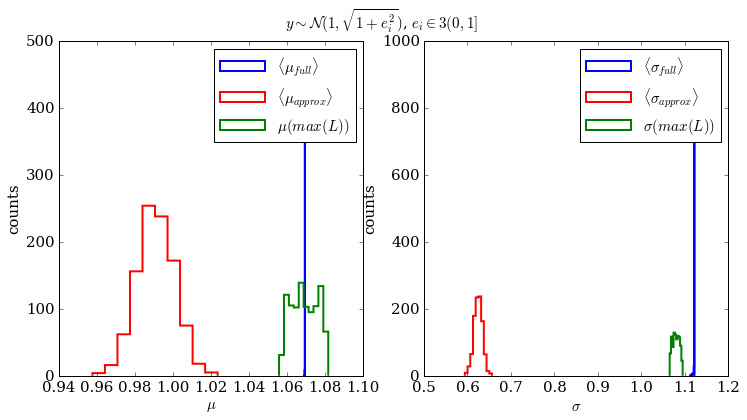

In [65]:
fig,ax = plt.subplots(1,2, figsize=(12,6))
#msk = record['amp_factor'] == record['amp_factor'][0]
met = ['exp', 'exp', '2D_max']
how = ['full', 'approx', 'full']
colors=['blue','r','g']
labels = [r'$\langle \mu_{full}\rangle$', r'$\langle \mu_{approx}\rangle$', r'$\mu(max(L))$']

for i in range(3):
    key = met[i]+'_mu_'+how[i]
    ax[0].hist(record[key], histtype='step', linestyle='-', normed=False, 
           label=labels[i], lw=2, color=colors[i], log=False)#

labels = [r'$\langle \sigma_{full}\rangle$', r'$\langle \sigma_{approx}\rangle$', r'$\sigma(max(L))$']
for i in range(3):
    key = met[i]+'_sig_'+how[i]
    ax[1].hist(record[key], histtype='step', linestyle='-', normed=False, 
           label=labels[i], lw=2, color=colors[i], log=False)#

ax[0].set_xlabel(r'$\mu$', fontsize=15)
ax[0].set_ylabel('counts', fontsize=15)
ax[1].set_xlabel(r'$\sigma$', fontsize=15)
ax[1].set_ylabel('counts', fontsize=15)
ax[0].legend(fontsize=15)
ax[1].legend(fontsize=15)

#fig.suptitle(r'$y = 0.1 \sin(t) + err$,    $err \sim \mathcal{N}(0,0.01)$', fontsize=20)
fig.suptitle(r'$y \sim \mathcal{N}(1,\sqrt{1+e_{i}^{2}})$, $e_{i} \in 3 (0,1]$ ', fontsize=15)
plt.savefig('../data_products/AstroML_10.1.1_rand_means.png')

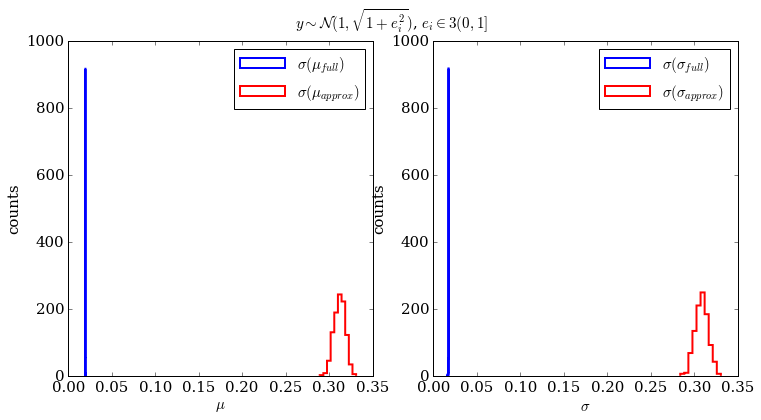

In [63]:
fig,ax = plt.subplots(1,2, figsize=(12,6))

ax[0].hist(record['std_mu_full'], histtype='step', linestyle='-', normed=False, 
           label=r'$\sigma(\mu_{full})$', lw=2, color='blue', log=False)
                  
ax[0].hist(record['std_mu_approx'], histtype='step', linestyle='-', normed=False, 
           label=r'$\sigma(\mu_{approx})$', lw=2, color='red', log=False)

ax[1].hist(record['std_sig_full'], histtype='step', linestyle='-', normed=False, 
           label=r'$\sigma(\sigma_{full})$', lw=2, color='blue', log=False)  

ax[1].hist(record['std_sig_approx'], histtype='step', linestyle='-', normed=False, 
           label=r'$\sigma(\sigma_{approx})$', lw=2, color='red', log=False)



ax[0].set_xlabel(r'$\mu$', fontsize=15)
ax[0].set_ylabel('counts', fontsize=15)
ax[1].set_xlabel(r'$\sigma$', fontsize=15)
ax[1].set_ylabel('counts', fontsize=15)
ax[0].legend(fontsize=15)
ax[1].legend(fontsize=15)

fig.suptitle(r'$  y \sim \mathcal{N}(1,\sqrt{1+e_{i}^{2}})$, $e_{i} \in 3 (0,1]$ ', fontsize=15)
#fig.subplots_adjust(hspace=0.2)
plt.savefig('../data_products/AstroML_10.1.1_rand_stdev.png')

In [ ]:
record_save_sin = record

(-1.143104143776029, -1.1431040148704825)

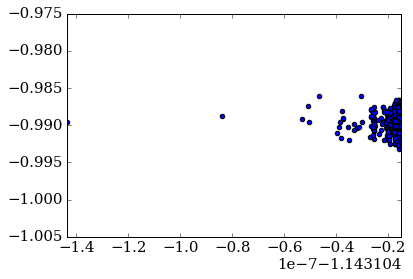

In [281]:
msk = record['amp_factor'] == record['amp_factor'][0]
fig,ax = plt.subplots()

ax.scatter(np.log10(record['exp_sig_full'][msk]),np.log10(record['exp_sig_approx'][msk]))
ax.set_xlim(min(np.log10(record['exp_sig_full'][msk])), max(np.log10(record['exp_sig_full'][msk])))
#ax.set_xlim( min(record['exp_sig_full'][msk]), max(record['exp_sig_full'][msk]))
#ax.set_ylim(min(record['exp_sig_approx'][msk]),max(record['exp_sig_approx'][msk]))

In [ ]:
plt.hist()

In [272]:
min(np.log10(record['exp_sig_full'][msk]))

-1.143710903309433

In [258]:
print min(record['exp_sig_full'][msk])
print max(record['exp_sig_full'][msk])
print min(record['exp_sig_approx'][msk])
print max(record['exp_sig_approx'][msk])

0.070579310436
0.0705793209867
0.0995669683232
0.100949276266


In [241]:
np.percentile(plot_data['mu_boot'], 50)

0.0013759779545683198

In [226]:
yWmean  = calcWeightedMean(plot_data['sigma'],plot_data['p_sigma'])
yWstd = calcWeightedStDev(plot_data['sigma'],plot_data['p_sigma'], yWmean)



In [243]:
plot_data.keys()

['p_sigma', 'sigma_boot', 'mu', 'p_mu', 'mu_boot', 'sigma', 'logL']

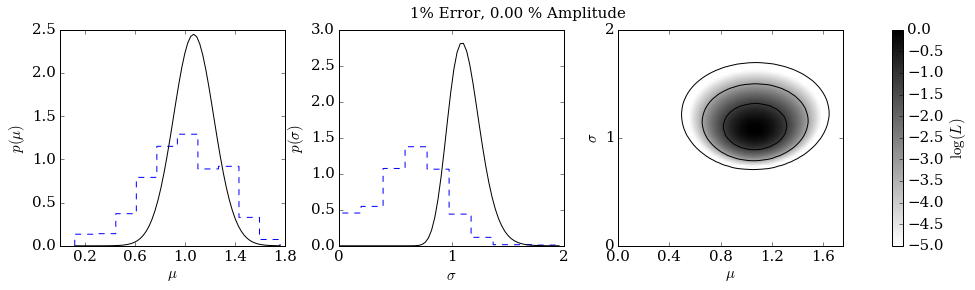

In [185]:
np.random.seed(5)
mu_true = 1.
sigma_true = 1.
N = 100
ei = 3 * np.random.random(N)
xi = np.random.normal(mu_true, np.sqrt(sigma_true ** 2 + ei ** 2))
plot_data, mu_flux, sigma_flux = varF.get_mu_sigma(xi, ei, N_boot=1000, return_plot_data=True)
plot_astroml_five_eight(plot_data,amp_factor,sig_factor)

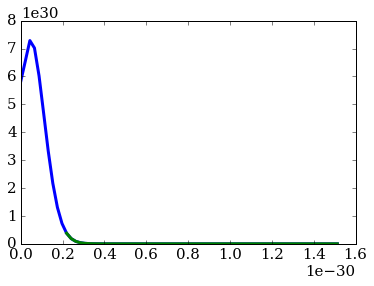

In [135]:
plt.plot(plot_data['sigma'], plot_data['p_sigma'], lw=3)
msk = plot_data['p_sigma'] < 0.1 * max(plot_data['p_sigma'])
plt.plot(plot_data['sigma'][msk], plot_data['p_sigma'][msk], lw=3)

7.2840094690623472e+29

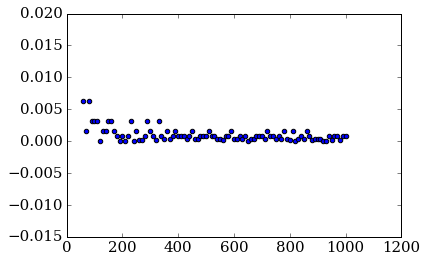

In [112]:
plt.scatter(N_arr,amp_min_factor)
#plt.scatter(N_arr, 2.9*sig_factor / np.power(N_arr, .25))

In [113]:
min(amp_min_factor)

5.9604644775390628e-09

In [98]:
import pandas as pd 
res_df = pd.DataFrame(res)
res_df['sigma_over_mean_flux'] = res_df['sigma_flux'] / flux_mean
res_df

,amp_factor,amp_flux,mu_flux,sigma_flux,sigma_over_mean_flux
0,0.001000,1.000000e-32,1.000571e-29,1.444556e-32,0.001445
1,0.004020,4.020202e-32,1.000993e-29,2.999269e-32,0.002999
2,0.007040,7.040404e-32,1.001599e-29,4.710939e-32,0.004711
3,0.010061,1.006061e-31,1.001618e-29,6.038603e-32,0.006039
4,0.013081,1.308081e-31,1.002135e-29,8.848808e-32,0.008849
5,0.016101,1.610101e-31,1.002223e-29,1.018110e-31,0.010181
6,0.019121,1.912121e-31,1.002024e-29,1.315407e-31,0.013154
7,0.022141,2.214141e-31,1.002531e-29,1.448209e-31,0.014482
8,0.025162,2.516162e-31,1.002333e-29,1.666000e-31,0.016660
9,0.028182,2.818182e-31,1.002927e-29,1.885844e-31,0.018858


,amp_factor,amp_flux,mu_flux,sigma_flux
0,0.010000,1.000000e-31,9.990919e-30,8.380934e-32
1,0.012929,1.292929e-31,9.997716e-30,1.053987e-31
2,0.015859,1.585859e-31,9.988565e-30,1.235056e-31
3,0.018788,1.878788e-31,9.992280e-30,1.494536e-31
4,0.021717,2.171717e-31,9.994459e-30,1.880571e-31
5,0.024646,2.464646e-31,9.992307e-30,2.048796e-31
6,0.027576,2.757576e-31,9.989055e-30,2.326403e-31
7,0.030505,3.050505e-31,9.990659e-30,2.510786e-31
8,0.033434,3.343434e-31,9.987768e-30,2.772163e-31
9,0.036364,3.636364e-31,9.988560e-30,2.956910e-31
